<a href="https://colab.research.google.com/github/paritoshkc/Computer-Vision-Project/blob/master/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The three coordinates of LAB represent the lightness of
the color (L* = 0 yields black and L* = 100 indicates
diffuse white; specular white may be higher), its position
between red/magenta and green (a*, negative values
indicate green while positive values indicate magenta) and
its position between yellow and blue (b*, negative values indicate blue and positive values indicate yellow) coordinate ranges from 0 to 100.


/content/drive/My Drive/Colab Notebooks/Computer Vision/blocks.jpg


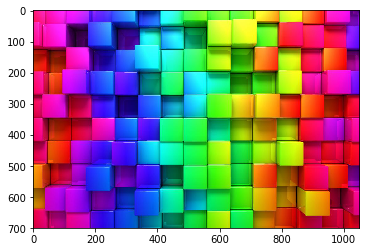

In [0]:
import numpy as np
from PIL import Image, ImageCms
import matplotlib.pyplot as plt
from scipy.ndimage import filters
%matplotlib inline
LAB=0
path_to_save='/content/drive/My Drive/Colab Notebooks/Computer Vision/'
path=path_to_save+'blocks.jpg'

def get_Image(path):
  
    # Open image and discard alpha channel which makes wheel round rather than square
  im = Image.open(path).convert('RGB')
  return im

def get_lab_color_system(image):
  # Convert to Lab colourspace
  srgb_p = ImageCms.createProfile("sRGB")
  lab_p  = ImageCms.createProfile("LAB")

  rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
  Lab = ImageCms.applyTransform(image, rgb2lab)
  LAB=Lab
  # Split into constituent channels so we can save 3 separate greyscales
  L, a, b = Lab.split()
  return L,a,b
  


print(path)
image_Src=get_Image(path)

plt.imshow(image_Src)

L,a,b=get_lab_color_system(image_Src)

L.save(path_to_save+'blocks_L.png')
a.save(path_to_save+'blocks_a.png')
b.save(path_to_save+'blocks_b.png')

plt.imshow(get_Image(path), cmap='gray', vmin=0, vmax=255)

Ix = I * Gx and Iy = I * Gy ,

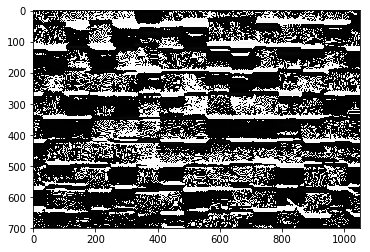

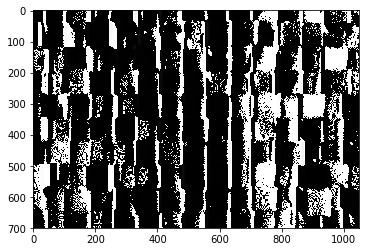

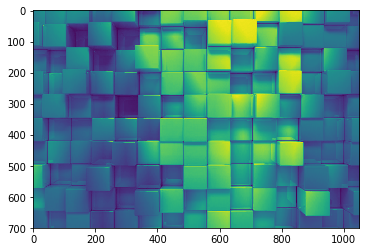

In [0]:
from scipy.ndimage import filters
import imageio

L=Image.open(path).convert('L')
im_x_array=np.array(L)
im_y_array=np.array(L)


#need to take out deravative 
imx = np.zeros(im_x_array.shape)
X_luminance=filters.gaussian_filter(L,sigma=3)
l_dx=np.diff(X_luminance,axis=0)


imy = np.zeros(im_y_array.shape)
blurred_img=filters.gaussian_filter(L,sigma=3)
l_dy=np.diff(blurred_img,axis=1)

imageio.imwrite(path_to_save+'blocks_L_y.jpg',l_dy)

figure()
plt.imshow(l_dx, cmap='gray', vmin=0, vmax=255)
figure()
plt.imshow(l_dy, cmap='gray', vmin=0, vmax=255)

figure()
plt.imshow(np.asarray(L))

Histograms Equalization

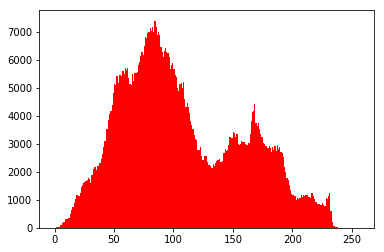

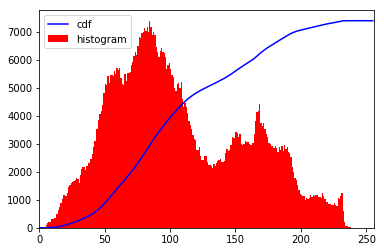

(array([2.657e+03, 2.295e+03, 3.368e+03, 2.393e+03, 3.004e+03, 3.225e+03,
        1.669e+03, 3.503e+03, 3.326e+03, 1.896e+03, 4.274e+03, 2.175e+03,
        2.059e+03, 4.513e+03, 2.310e+03, 2.474e+03, 2.641e+03, 2.896e+03,
        3.121e+03, 3.547e+03, 0.000e+00, 3.535e+03, 3.843e+03, 4.054e+03,
        0.000e+00, 4.194e+03, 4.377e+03, 0.000e+00, 4.805e+03, 0.000e+00,
        5.129e+03, 0.000e+00, 5.123e+03, 5.418e+03, 0.000e+00, 5.163e+03,
        0.000e+00, 5.472e+03, 0.000e+00, 5.465e+03, 0.000e+00, 5.425e+03,
        0.000e+00, 5.603e+03, 0.000e+00, 5.498e+03, 0.000e+00, 5.712e+03,
        0.000e+00, 5.653e+03, 0.000e+00, 5.706e+03, 0.000e+00, 5.352e+03,
        5.151e+03, 0.000e+00, 5.123e+03, 0.000e+00, 5.504e+03, 0.000e+00,
        5.264e+03, 0.000e+00, 5.535e+03, 0.000e+00, 5.549e+03, 0.000e+00,
        5.573e+03, 0.000e+00, 5.816e+03, 0.000e+00, 5.929e+03, 0.000e+00,
        6.139e+03, 0.000e+00, 6.271e+03, 0.000e+00, 6.195e+03, 0.000e+00,
        6.516e+03, 0.000e+00, 0.000e+0

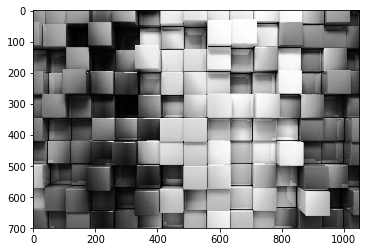

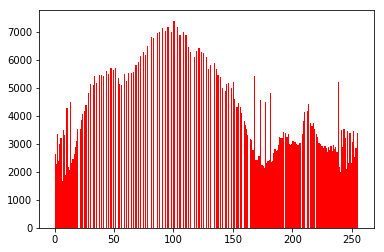

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from PIL import Image
from google.colab.patches import cv2_imshow as sh
from pylab import *

%matplotlib inline

path_to_save='/content/drive/My Drive/Colab Notebooks/Computer Vision/'
path=path_to_save+'blocks.jpg'


img = array(Image.open(path).convert('L'))

figure()
plt.hist(img.flatten(),256,[0,256], color = 'r')

figure()
#gray()
#hist(im.flatten(),256)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
#print( cdf)
cdf_normalized = cdf * hist.max()/ cdf.max()
#print(cdf_normalized)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
imageio.imwrite(path_to_save+'blocks_HE_nogrey.jpg',img2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
figure()
plt.hist(img2.flatten(),256,[0,256], color = 'r')
#img = cv2.imread(path)
#cv2.namedWindow(winname = "Grayscale Image", flags = cv2.WINDOW_NORMAL)
#print(L)


#hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#L,a,b=get_lab_color_system(get_Image(path))
#hist, xbins, ybins = np.histogram2d(a.ravel(),b.ravel(),[180,256],[[0,180],[0,256]])

# def get_HSV_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#     return image
# def get_Grey_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return image

# #L,a,b=get_lab_color_system(get_HSV_image(path))
# #H, a_edges, b_edges = np.histogram2d(a, b, bins=10)
# #heatmap, xedges, yedges = np.histogram2d(np.asarray(a),np.asarray(b))
# plt.hist(np.asarray(a),256,[0,256])
# plt.show()

TypeError: ignored

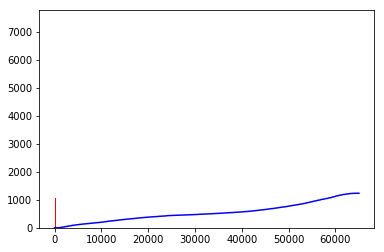

In [0]:
def histeq(im,nbr_bins=256):
# get image histogram
    imhist,bins = histogram(im,nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im,bins[:-1],cdf)
    return im2.reshape(np.asarray(im).shape), cdf

  
  
img = array(Image.open(path).convert('L'))

figure()
plt.hist(img.flatten(),256,[0,256], color = 'r')

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')



im,cdf=histeq(L)

figure()
plt.hist(im.flatten(),256,[0,256], color = 'r')
#cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
figure()
plt.imshow(im, cmap='gray', vmin=0, vmax=255)


# image = get_Grey_image('/content/drive/My Drive/Colab Notebooks/Computer Vision/TCD.jpg')
# print("The type of this input is {}".format(type(image)))
# print("Shape: {}".format(image.shape))
# [width,height]=image.shape
# plt.imshow(image)

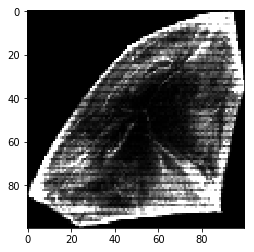

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


L,a,b=get_lab_color_system(image_Src) 


histogram, xedges, yedges = np.histogram2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=100)
plt.imshow(histogram,interpolation = 'nearest', cmap='gray', vmin=0, vmax=255)




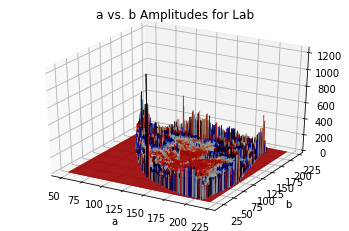

In [0]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


XY = np.stack((a,b),axis=-1)

fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111,projection='3d')


hist, xedges, yedges = np.histogram2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=255)
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
cmap = cm.get_cmap('flag') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("a vs. b Amplitudes for Lab")
plt.xlabel("a")
plt.ylabel("b")
plt.savefig(path_to_save+'histogram')
plt.show()

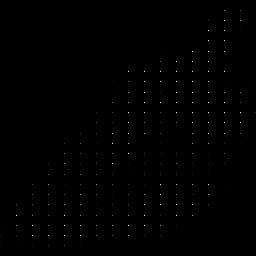

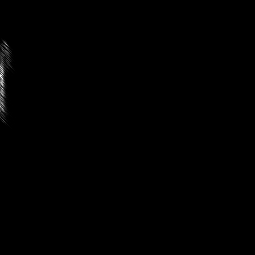

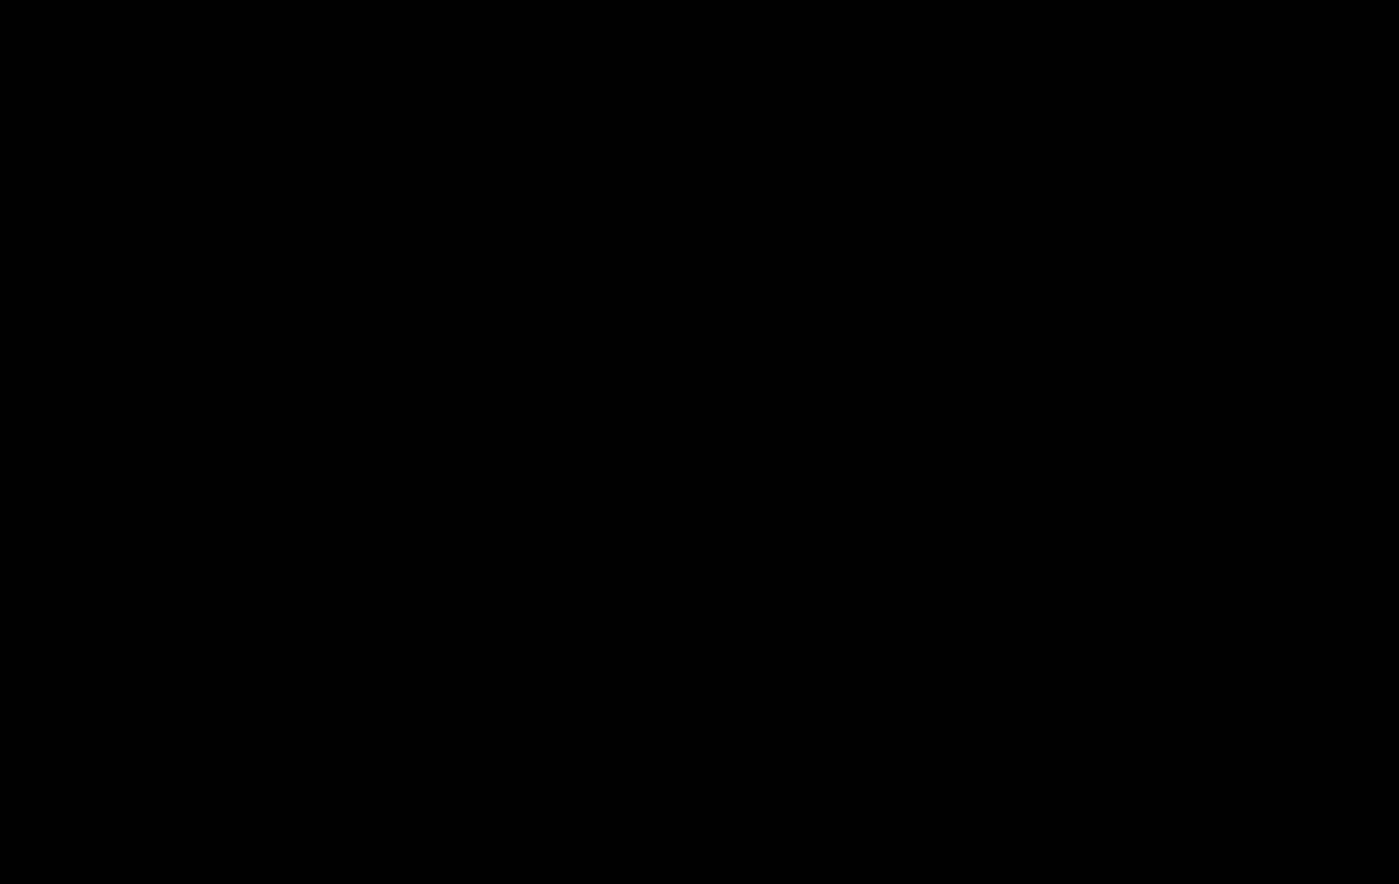

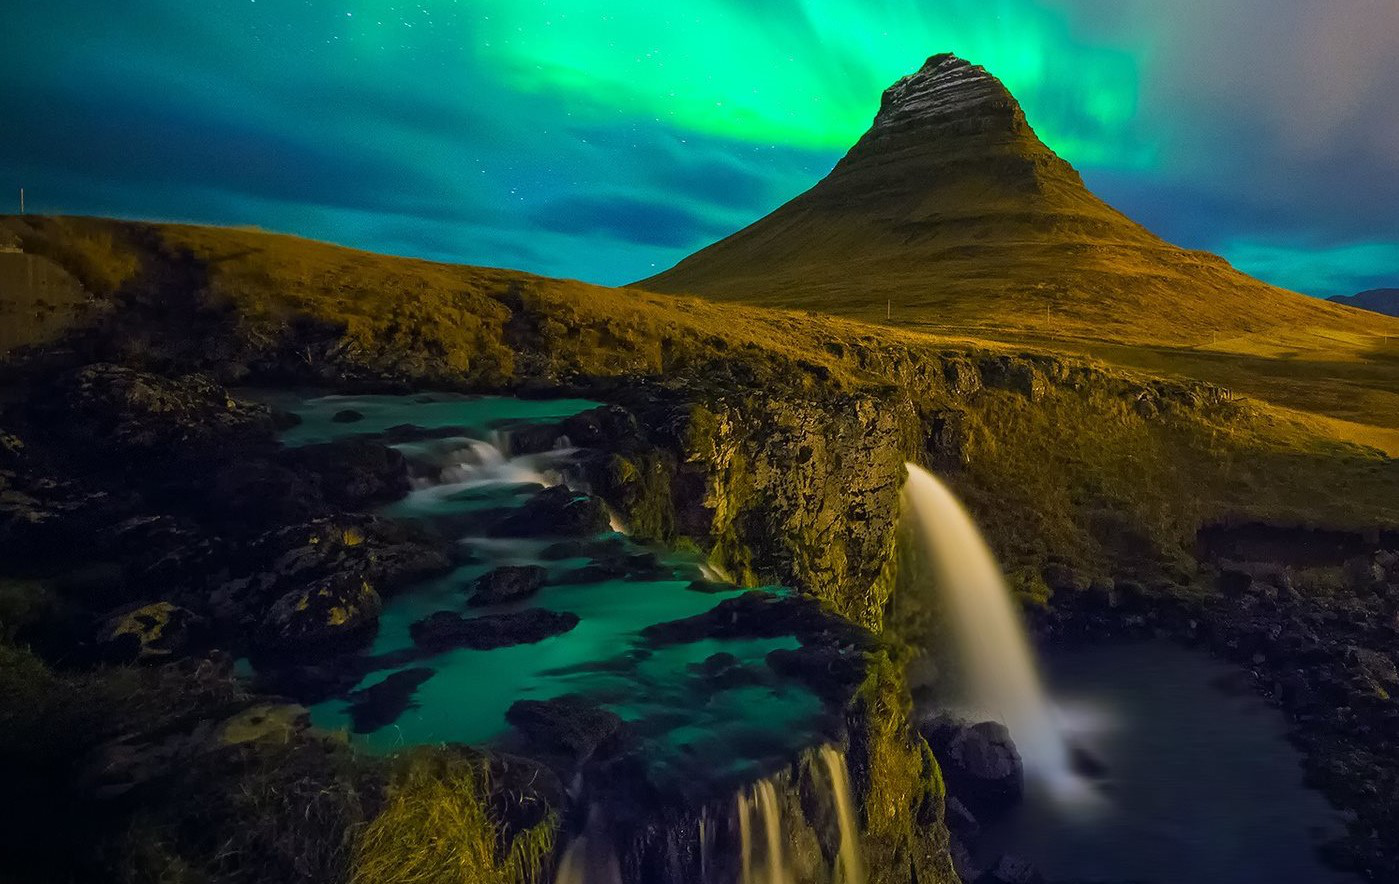

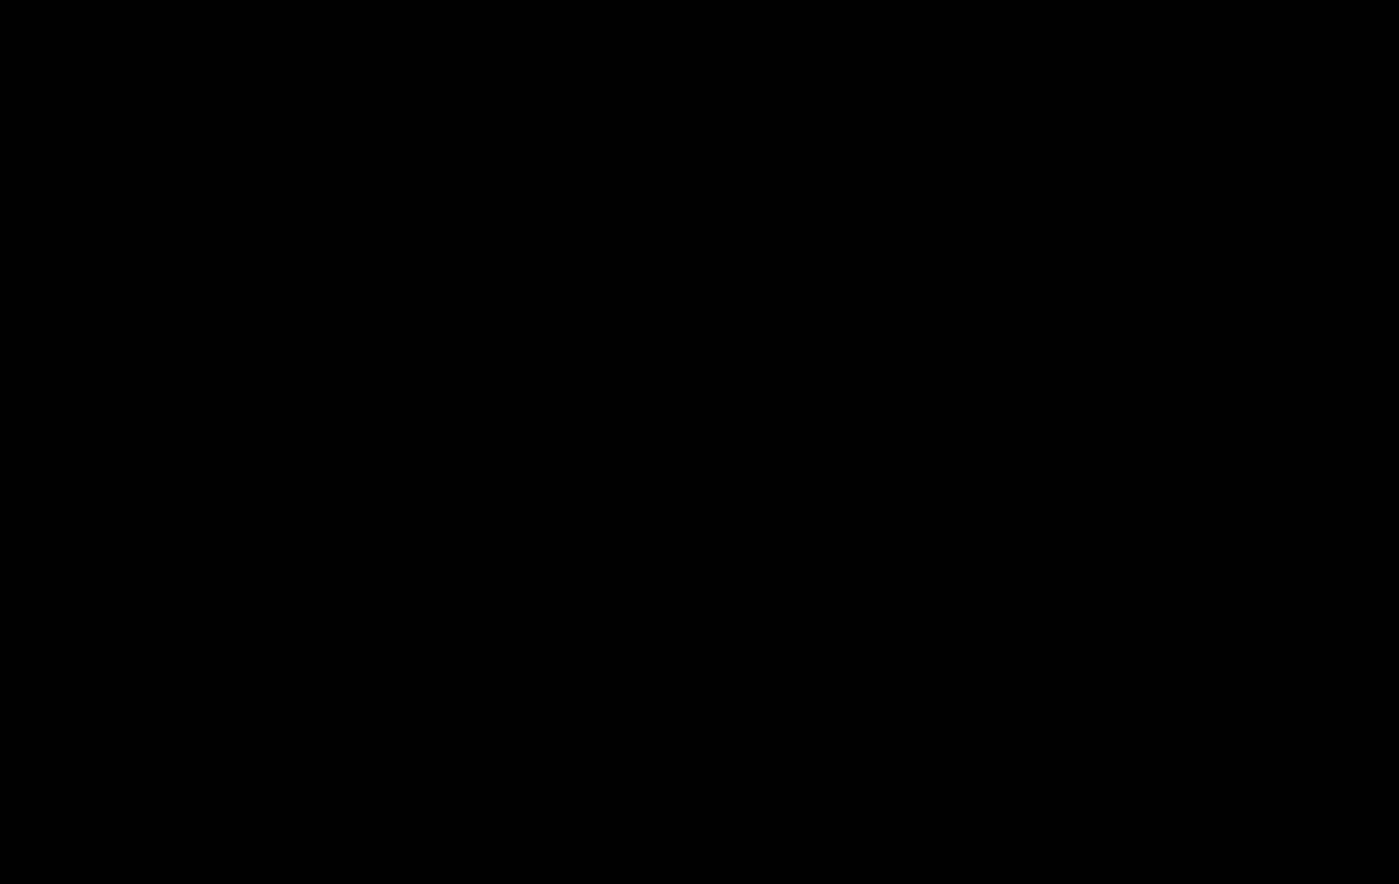

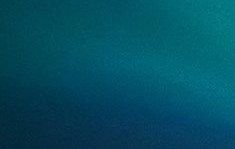

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline
#L,a,b=get_lab_color_system(image_Src) 


#print(original_image.shape)



#L,a,b=get_lab_color_system(np.asarray(roi) )


#histogram, xedges, yedges = np.histogram2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=100)
#plt.imshow(histogram,interpolation = 'nearest', cmap='gray', vmin=0, vmax=255)


original_image= cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/target_Image.png')
rows, cols, ch = original_image.shape
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)

roi=cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/cropped_image.png')
#roi = original_image[40:130, 180: 270]
  
lab = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
L,a,b=cv2.split(lab)
#hue, saturation, value = cv2.split(hsv_roi)
# Histogram ROI
roi_hist_x , xedges, yedges = np.histogram2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=256)
cv2_imshow( roi_hist_x)

roi_hist = cv2.calcHist( [roi], [1, 2], None, [255, 255], [0, 255, 0, 255] )
cv2_imshow( roi_hist)
mask = cv2.calcBackProject([hsv_original], [1, 2], roi_hist, [0, 255, 0, 255], 1)


# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(original_image, mask)
cv2.imwrite('res.jpg',result)
cv2_imshow( mask)
cv2_imshow( original_image)
cv2_imshow( result)
cv2_imshow( roi)


#ROI = image_Src[0:1, 0:1]
#r = cv2.selectROI(np.asarray(image_Src))
     
    # Crop image
#imCrop = L[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
 
    # Display cropped image
#cv2_imshow(roi)
#cv2_imshow(original_image)


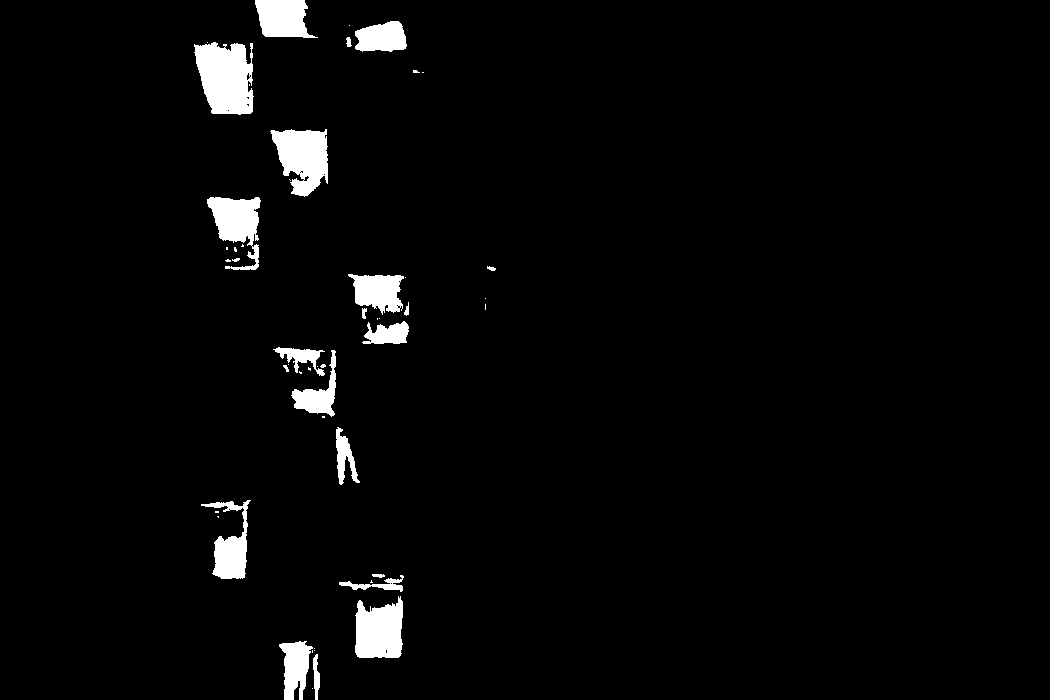

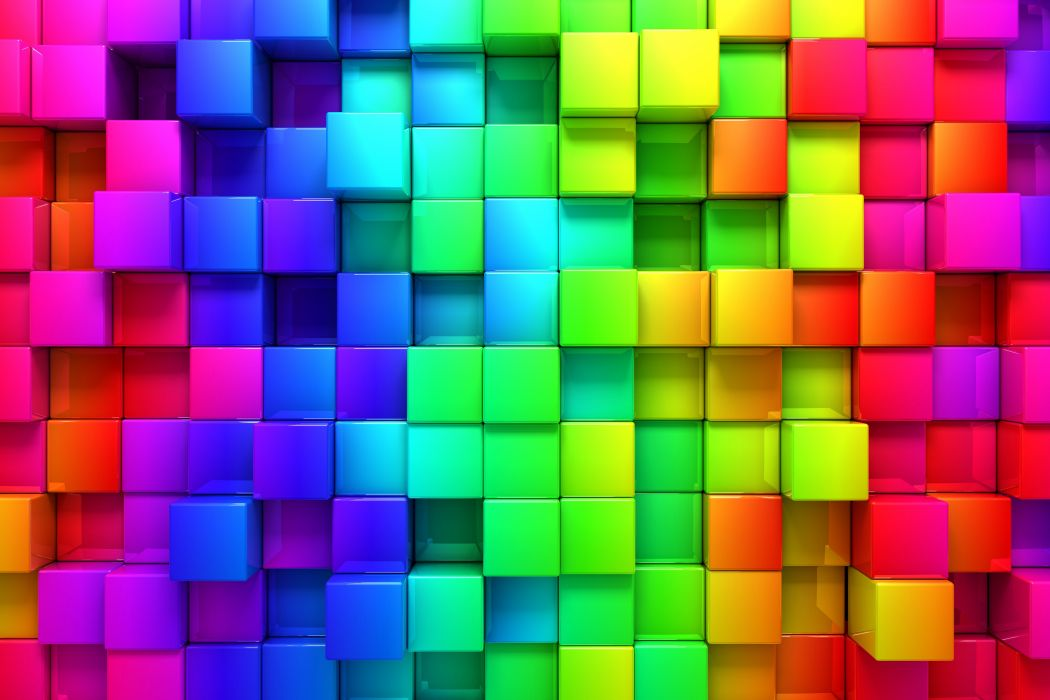

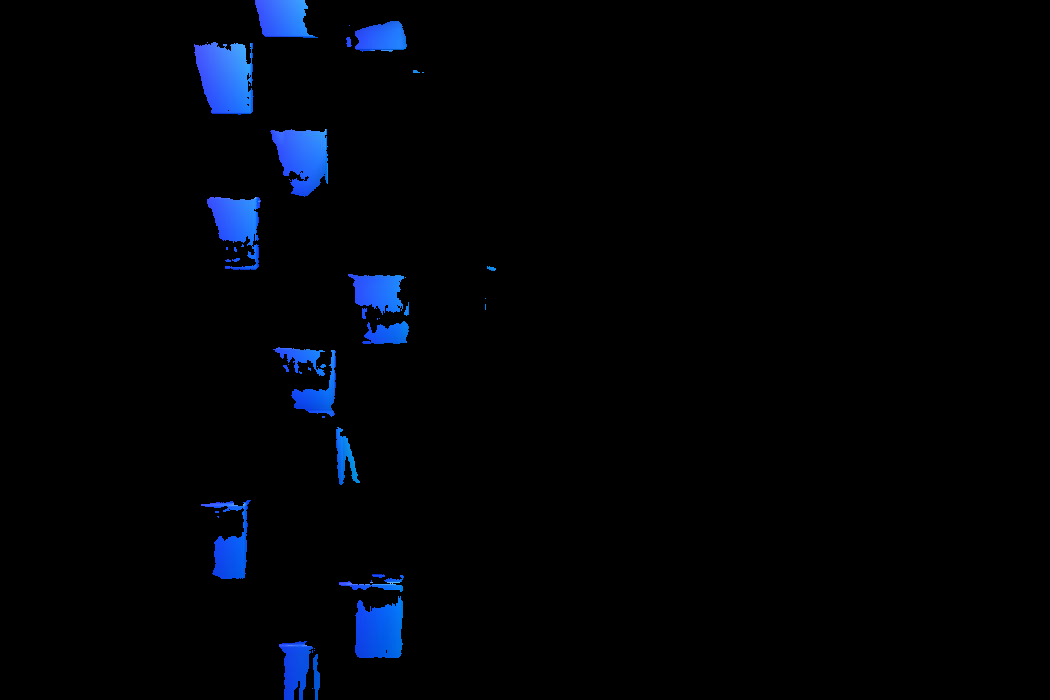

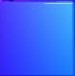

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

original_image= cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/blocks.jpg')
#cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/goalkeeper.jpg')
rows, cols, ch = original_image.shape
lab_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)
roi=cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/target.jpg')
#cv2.imread('/content/drive/My Drive/Colab Notebooks/Computer Vision/pitch_ground.jpg')

lab_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
L,a,b = cv2.split(lab_roi)
# Histogram ROI
roi_hist = cv2.calcHist([lab_roi], [1, 2], None, [180, 256], [0, 180, 0, 256])
mask = cv2.calcBackProject([lab_original], [1, 2], roi_hist, [0, 180, 0, 256], 1)
# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(original_image, mask)
cv2_imshow(mask)
cv2_imshow(original_image)
cv2_imshow(result)
cv2_imshow(roi)


In [0]:


# histogram, xedges, yedges = np.histogram2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=100)
# #plt.imshow(histogram,interpolation = 'nearest', cmap='gray', vmin=0, vmax=255)


# original_image = cv2.imread(path)
# hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
# #roi = cv2.imread("pitch_ground.jpg")
# #hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
# #hue, saturation, value = cv2.split(hsv_roi)
# # Histogram ROI
# #roi_hist = histogram
# mask = cv2.calcBackProject([hsv_original], [0, 1], histogram, [0, 180, 0, 256], 1)
# # Filtering remove noise
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# mask = cv2.filter2D(mask, -1, kernel)
# _, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
# mask = cv2.merge((mask, mask, mask))
# result = cv2.bitwise_and(original_image, mask)
# cv2_imshow(mask)
# cv2_imshow(hsv_original)
# cv2_imshow(result)
#cv2_imshow(roi)

# def Hist_and_Backproj(val):
    
#     bins = val
#     histSize = max(bins, 2)
#     ranges = [0, 180] # hue_range
    
    
#     hist = cv.calcHist([hue], [0], None, [histSize], ranges, accumulate=False)
#     cv.normalize(hist, hist, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    
    
#     backproj = cv.calcBackProject([hue], [0], hist, ranges, scale=1)
    
    
#     cv.imshow('BackProj', backproj)
    
    
#     w = 400
#     h = 400
#     bin_w = int(round(w / histSize))
#     histImg = np.zeros((h, w, 3), dtype=np.uint8)
#     for i in range(bins):
#         cv.rectangle(histImg, (i*bin_w, h), ( (i+1)*bin_w, h - int(round( hist[i]*h/255.0 )) ), (0, 0, 255), cv.FILLED)
#     cv.imshow('Histogram', histImg)
    
# parser = argparse.ArgumentParser(description='Code for Back Projection tutorial.')
# parser.add_argument('--input', help='Path to input image.')
# args = parser.parse_args()
# src = cv.imread(args.input)
# if src is None:
#     print('Could not open or find the image:', args.input)
#     exit(0)
# hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
# ch = (0, 0)
# hue = np.empty(hsv.shape, hsv.dtype)
# cv.mixChannels([hsv], [hue], ch)
# window_image = 'Source image'
# cv.namedWindow(window_image)
# bins = 25
# cv.createTrackbar('* Hue  bins: ', window_image, bins, 180, Hist_and_Backproj )
# Hist_and_Backproj(bins)
# cv.imshow(window_image, src)
# cv.waitKey()
#-----------------------------------------------------------
# def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
#         XY_select = []
#         for elt in XY:
#             if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
#                 XY_select.append(elt)

#         return np.array(XY_select)

# XY_select = selection(XY, limitXY=[[-2,+2],[-2,+2]])


# xAmplitudes = np.array(XY_select)[:,0]#your data here
# yAmplitudes = np.array(XY_select)[:,1]#your other data here




#______________________________________________________________________________
#show_grayscale_histogram(np.asarray(L))
#show_grayscale_histogram(np.asarray(a))
#show_grayscale_histogram(np.asarray(b))
#show_image_histogram_2d(np.asarray(L))

# fig2 = plt.figure()
# plt.hist2d(np.asarray(a).flatten(), np.asarray(b).flatten(), bins=100,cmap='Greys')
# plt.xlabel('a')
# plt.ylabel('b')
#cbar = plt.colorbar()
#cbar.ax.set_ylabel('Counts')

#H, xedges, yedges = histogram2d_t(np.asarray(a), np.asarray(b), bins=50,range=[(0,256),(0,256)])
#H = H.T 
    
# img = cv2.imread(path)
# hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )


# L,a,b=get_lab_color_system(image_Src)

# xedges=a.size
# yedges=b.size
# print(a)
# print(np.asarray(a))
# hist =cv2.calcHist(a, [0],None, [256], [0, 256])
# plt.plot(hist, color=color)
# plt.xlim([0, 256])

#H, xedges, yedges = np.histogram2d([a], [b], bins=(xedges))
#plt.imshow(hist,interpolation = 'nearest')
#plt.show()





# def draw_image_histogram(image, channels, color='k'):
#     hist = cv2.calcHist([image], channels, None, [256], [0, 256])
#     plt.plot(hist, color=color)
#     plt.xlim([0, 256])
    
    
# def show_grayscale_histogram(image):
#     #grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     draw_image_histogram(image, [0])
#     plt.show() 
    
# def histogram2d_t(x, y, bins, range, weights=None):
#     """
#     Compute a 2D histogram assuming equally spaced bins.
#     Parameters
#     ----------
#     x, y : `~numpy.ndarray`
#         The position of the points to bin in the 2D histogram
#     bins : int or iterable
#         The number of bins in each dimension. If given as an integer, the same
#         number of bins is used for each dimension.
#     range : iterable
#         The range to use in each dimention, as an iterable of value pairs, i.e.
#         [(xmin, xmax), (ymin, ymax)]
#     weights : `~numpy.ndarray`
#         The weights of the points in the 1D histogram
#     Returns
#     -------
#     array : `~numpy.ndarray`
#         The 2D histogram array
#     """

#     if isinstance(bins, numbers.Integral):
#         nx = ny = bins
#     else:
#         nx, ny = bins

#     if not np.isscalar(nx) or not np.isscalar(ny):
#         raise TypeError('bins should be an iterable of two integers')

#     (xmin, xmax), (ymin, ymax) = range

#     if not np.isfinite(xmin):
#         raise ValueError("xmin should be finite")

#     if not np.isfinite(xmax):
#         raise ValueError("xmax should be finite")

#     if not np.isfinite(ymin):
#         raise ValueError("ymin should be finite")

#     if not np.isfinite(ymax):
#         raise ValueError("ymax should be finite")

#     if xmax <= xmin:
#         raise ValueError("xmax should be greater than xmin")

#     if ymax <= ymin:
#         raise ValueError("xmax should be greater than xmin")

#     if nx <= 0:
#         raise ValueError("nx should be strictly positive")

#     if ny <= 0:
#         raise ValueError("ny should be strictly positive")

#     if weights is None:
#         return _histogram2d(x, y, nx, xmin, xmax, ny, ymin, ymax)
#     else:
#         return _histogram2d_weighted(x, y, weights, nx, xmin, xmax, ny, ymin, ymax)

# def show_image_histogram_2d(image, bins=256, tick_spacing=5):
#     fig, axes = plt.subplots(1, 3, figsize=(12, 5))
#     channels_mapping = {0: 'L', 1: 'a', 2: 'b'}
#     for i, channels in enumerate([[0, 1], [0, 2], [1, 2]]):
#         hist = cv2.calcHist([image], channels, None, [bins] * 2, [0, 256] * 2)

#         channel_x = channels_mapping[channels[1]]
#         channel_y = channels_mapping[channels[2]]

#         ax = axes[i]
#         ax.set_xlim([0, bins - 1])
#         ax.set_ylim([0, bins - 1])

#         ax.set_xlabel(f'Channel {channel_x}')
#         ax.set_ylabel(f'Channel {channel_y}')
#         ax.set_title(f'2D Color Histogram for {channel_x} and '
#                      f'{channel_y}')

#         ax.yaxis.set_major_locator(
#             ticker.MultipleLocator(tick_spacing))
#         ax.xaxis.set_major_locator(
#             ticker.MultipleLocator(tick_spacing))

#         im = ax.imshow(hist)

#     fig.colorbar(im, ax=axes.ravel().tolist(),
#                  orientation='orizontal')
#     fig.suptitle(f'2D Color Histograms with {bins} bins',
#                  fontsize=16)
#     plt.show()